# <center><div style="font-family: Trebuchet MS; background-color: #023047; color: #ffb703; padding: 12px; line-height: 1;">Welcome To Space Race</div></center>

<font size='6'> Problem Statement: </font>

SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars, other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against SpaceX for a rocket launch. so we will collect and make sure the data is in the correct format from an API.

SpaceX Falcon Heavy rocket:

<center>
    <img src="https://planetary.s3.amazonaws.com/web/assets/pictures/20180920_falcon-heavy-closeup-ryan-chylinski-1200px-15fps.gif" width="900" height="600">
</center>



<font size='6'> Aim: </font>

- we will predict if the Falcon 9 first stage will land successfully. 

<font size='6'> Notebook Objectives: </font>
- Exploratory Data Analysis
- Deep Aanalyis

In [1]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a Matlab like plotting framework 
import matplotlib.pyplot as plt
# Seaborn is a python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# warnings provides a way to control how warnings handled within a Python script
import warnings
warnings.filterwarnings('ignore')
# Python library that helps you create several types of Leaflet maps
import folium
import folium.features
import folium.map
from folium import plugins

<font size='6'>Exeploratory Data Analysis</font>

In [2]:
# load the dataset and show it as a pandas dataframe
df = pd.read_csv('spaceX.csv')
df.head()

,FlightNumber,Date,BoosterName,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


<font size='6'> Flight Number, Pay Load Mass(kg) VS  the outcome of each launch </font>

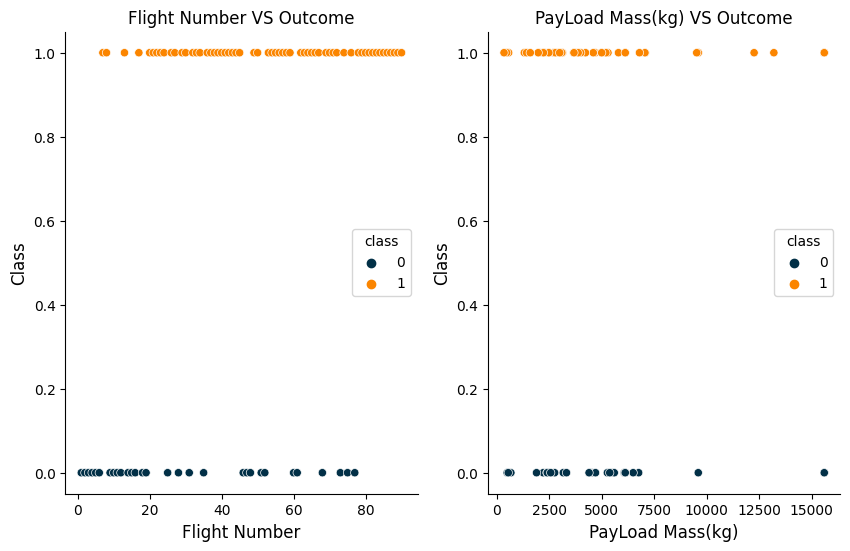

In [3]:
customPalette = {0:"#023047", 1:"#fb8500"}

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='FlightNumber', y='class', hue='class', palette=customPalette)
sns.despine()
plt.xlabel('Flight Number', fontsize='12')
plt.ylabel('Class', fontsize='12')
plt.title('Flight Number VS Outcome')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='PayloadMass', y='class', hue='class', palette=customPalette)
sns.despine()
plt.xlabel('PayLoad Mass(kg)', fontsize='12')
plt.ylabel('Class', fontsize='12')
plt.title('PayLoad Mass(kg) VS Outcome')

plt.show()

*observations:* 
- As the flight number increases, the first stage is more likely to land successfully.
- The more massive the payload the less likely the first stage will return

<font size='6'> Launch Site VS Flight Number Overlaid With The Outcome </font>

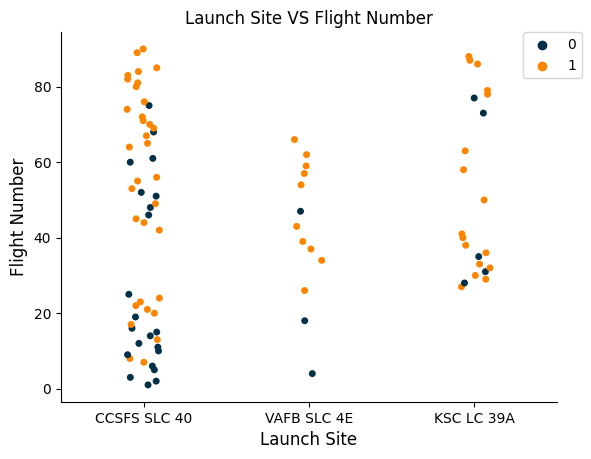

In [4]:
sns.stripplot(data=df, x='LaunchSite', y='FlightNumber', hue='class', palette=customPalette)
sns.despine()
plt.xlabel('Launch Site', fontsize=12)
plt.ylabel('Flight Number', fontsize=12)
plt.title('Launch Site VS Flight Number')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0)

plt.show()

*observations:*
- Above the flight number 40, __CCAFS LC-40__ site displays the most successful landings.
- __VAFB SLC 4E__ and __KSC LC-39A__  sites display successful landings from the flight number 25 to higher.
- __VAFB SLC 4E__ site displays the minimum number of unsuccessful landings.
- __CCAFS LC-40__, __KSC LC 39A__, __VAFB SLC 4E__ in that order display high, middle and low successful landing rates.
- Later flights have higher success rate than earlier flights

<font size='6'> Count of Each Launch Site Overlaid with the Outcome </font>

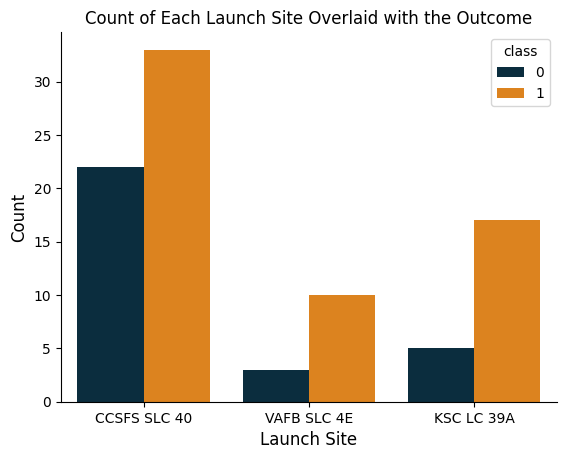

In [5]:
sns.countplot(data=df, x='LaunchSite', hue='class', palette=customPalette)
sns.despine()
plt.xlabel('Launch Site', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Each Launch Site Overlaid with the Outcome', fontsize=12)

plt.show()

*Observations:*
<table>
  <tr>
    <th>LaunchSite</th>
    <th>class</th>
    <th>count</th>
  </tr>
  <tr>
    <td rowspan="2">CCSFS SLC 40</td>
    <td>0</td>
    <td>22</td>
  </tr>
  <tr>
    <td>1</td>
    <td>33</td>
  </tr>
  <tr>
    <td rowspan="2">KSC LC 39A</td>
    <td>0</td>
    <td>5</td>
  </tr>
  <tr>
    <td>1</td>
    <td>17</td>
  </tr>
  <tr>
    <td rowspan="2">VAFB SLC 4E</td>
    <td>0</td>
    <td>3</td>
  </tr>
  <tr>
    <td>1</td>
    <td>10</td>
  </tr>
</table>

<font size='6'> Payload Vs Launch Site Overlaid With The Outcome </font>

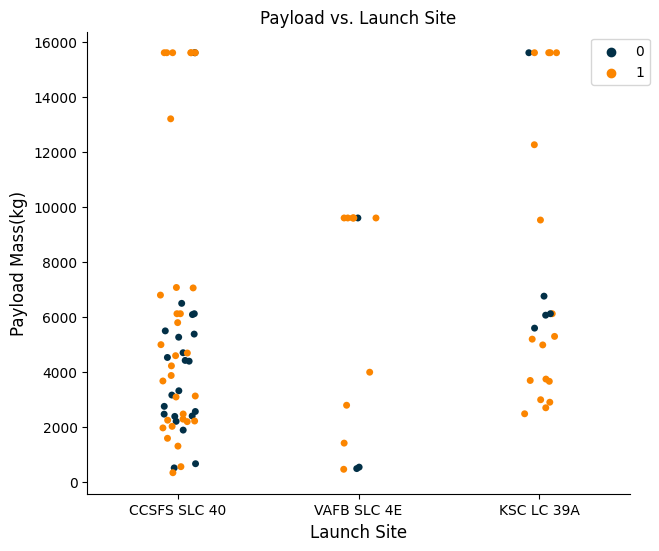

In [6]:
plt.figure(figsize=(7, 6))
sns.stripplot(data=df, x='LaunchSite', y='PayloadMass', hue='class', palette=customPalette)
sns.despine()
plt.xlabel('Launch Site', fontsize=12)
plt.ylabel('Payload Mass(kg)', fontsize=12)
plt.title('Payload vs. Launch Site', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1))

plt.show()

*Observations:*
- Most launches with a payload mass greater than 7000 kg were successful.
- __KSC LC-39A__ has 100% success rate for launches less than 5500 kg.
- __VAFB SKC 4E__ hasn't launched any flight greater than 10000kg.

<font size='6'> The Most Suitable Site For The Heaviest Payload Flights </font>

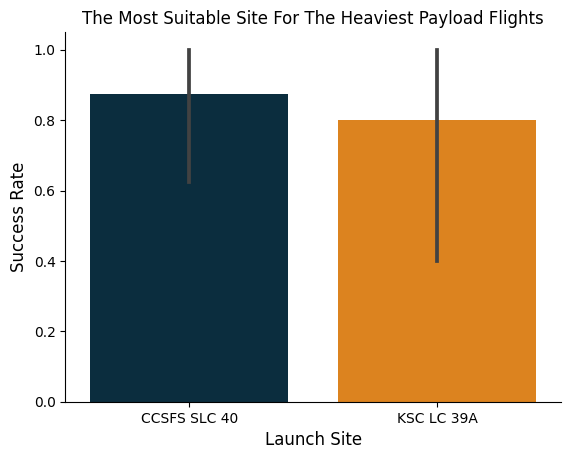

In [19]:
SiteDF = df[df['PayloadMass'] == df['PayloadMass'].max()]
palette = ['#023047', '#fb8500', '#219ebc'] 
sns.barplot(data=SiteDF, x='LaunchSite', y='class', estimator=np.mean, palette=palette)
sns.despine()
plt.xlabel('Launch Site', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.title('The Most Suitable Site For The Heaviest Payload Flights')

plt.show()

*Observations*
- __CCSFS SLC 40__ site launched the most heaviest flights.

- 
  | LaunchSite  | Success Rate |
  |-------------|--------------|
  | CCSFS SLC 40|    0.875     |
  | KSC LC 39A  |    0.8       |

<font size='6'> Orbits success ratess </font>

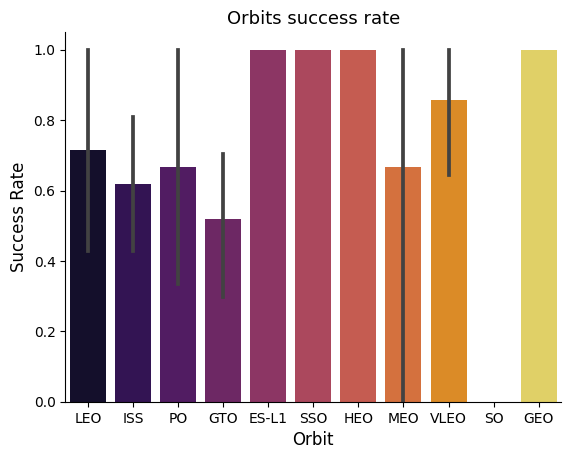

In [23]:
sns.barplot(data=df, x='Orbit', y='class', estimator=np.mean, palette='inferno')
sns.despine()
plt.xlabel('Orbit', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.title('Orbits success rate', fontsize=13)

plt.show()

*Observations:*
- __ES-L1__, __SSO__, __HEO__, __GEO__: 100% success rate.
-  __GTO__, __ISS__, __PO__, __MEO__, __LEO__: 50% : 80% success rate.
- __SO__: 0% success rate.


<font size='6'> Grid Fins VS. Payload Mass </font>

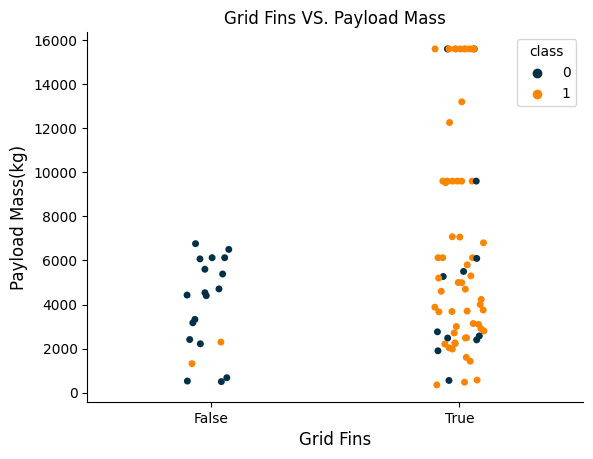

In [10]:
sns.stripplot(data=df, x='GridFins', y='PayloadMass', hue='class', palette=customPalette)
sns.despine()
plt.xlabel('Grid Fins', fontsize=12)
plt.ylabel('Payload Mass(kg)', fontsize=12)
plt.title('Grid Fins VS. Payload Mass', fontsize=12)

plt.show()

*Observations:*
- alomost all successful flights used Grid fins.
- Grid fins gives more stability during rocket landing although Payload Mass increasing.

-  <table>
  <tr>
    <th>GridFins</th>
    <th>class</th>
    <th>count</th>
  </tr>
  <tr>
    <td rowspan="2">False</td>
    <td>0</td>
    <td>18</td>
  </tr>
  <tr>
    <td>1</td>
    <td>2</td>
  </tr>
  <tr>
    <td rowspan="2">True</td>
    <td>0</td>
    <td>12</td>
  </tr>
  <tr>
    <td>1</td>
    <td>58</td>
  </tr>
</table>



<font size='6'> Geometry of Space X Falcon 9 Grid Fin </font>

<p align="center">
  <img src="Images/Geometry of SpaceX Falcon 9 grid fin .png" alt="Geometry of SpaceX Falcon 9 grid fin">
</p>


<font size='6'> Flight Number VS. Orbit </font>

<Figure size 2000x2000 with 0 Axes>

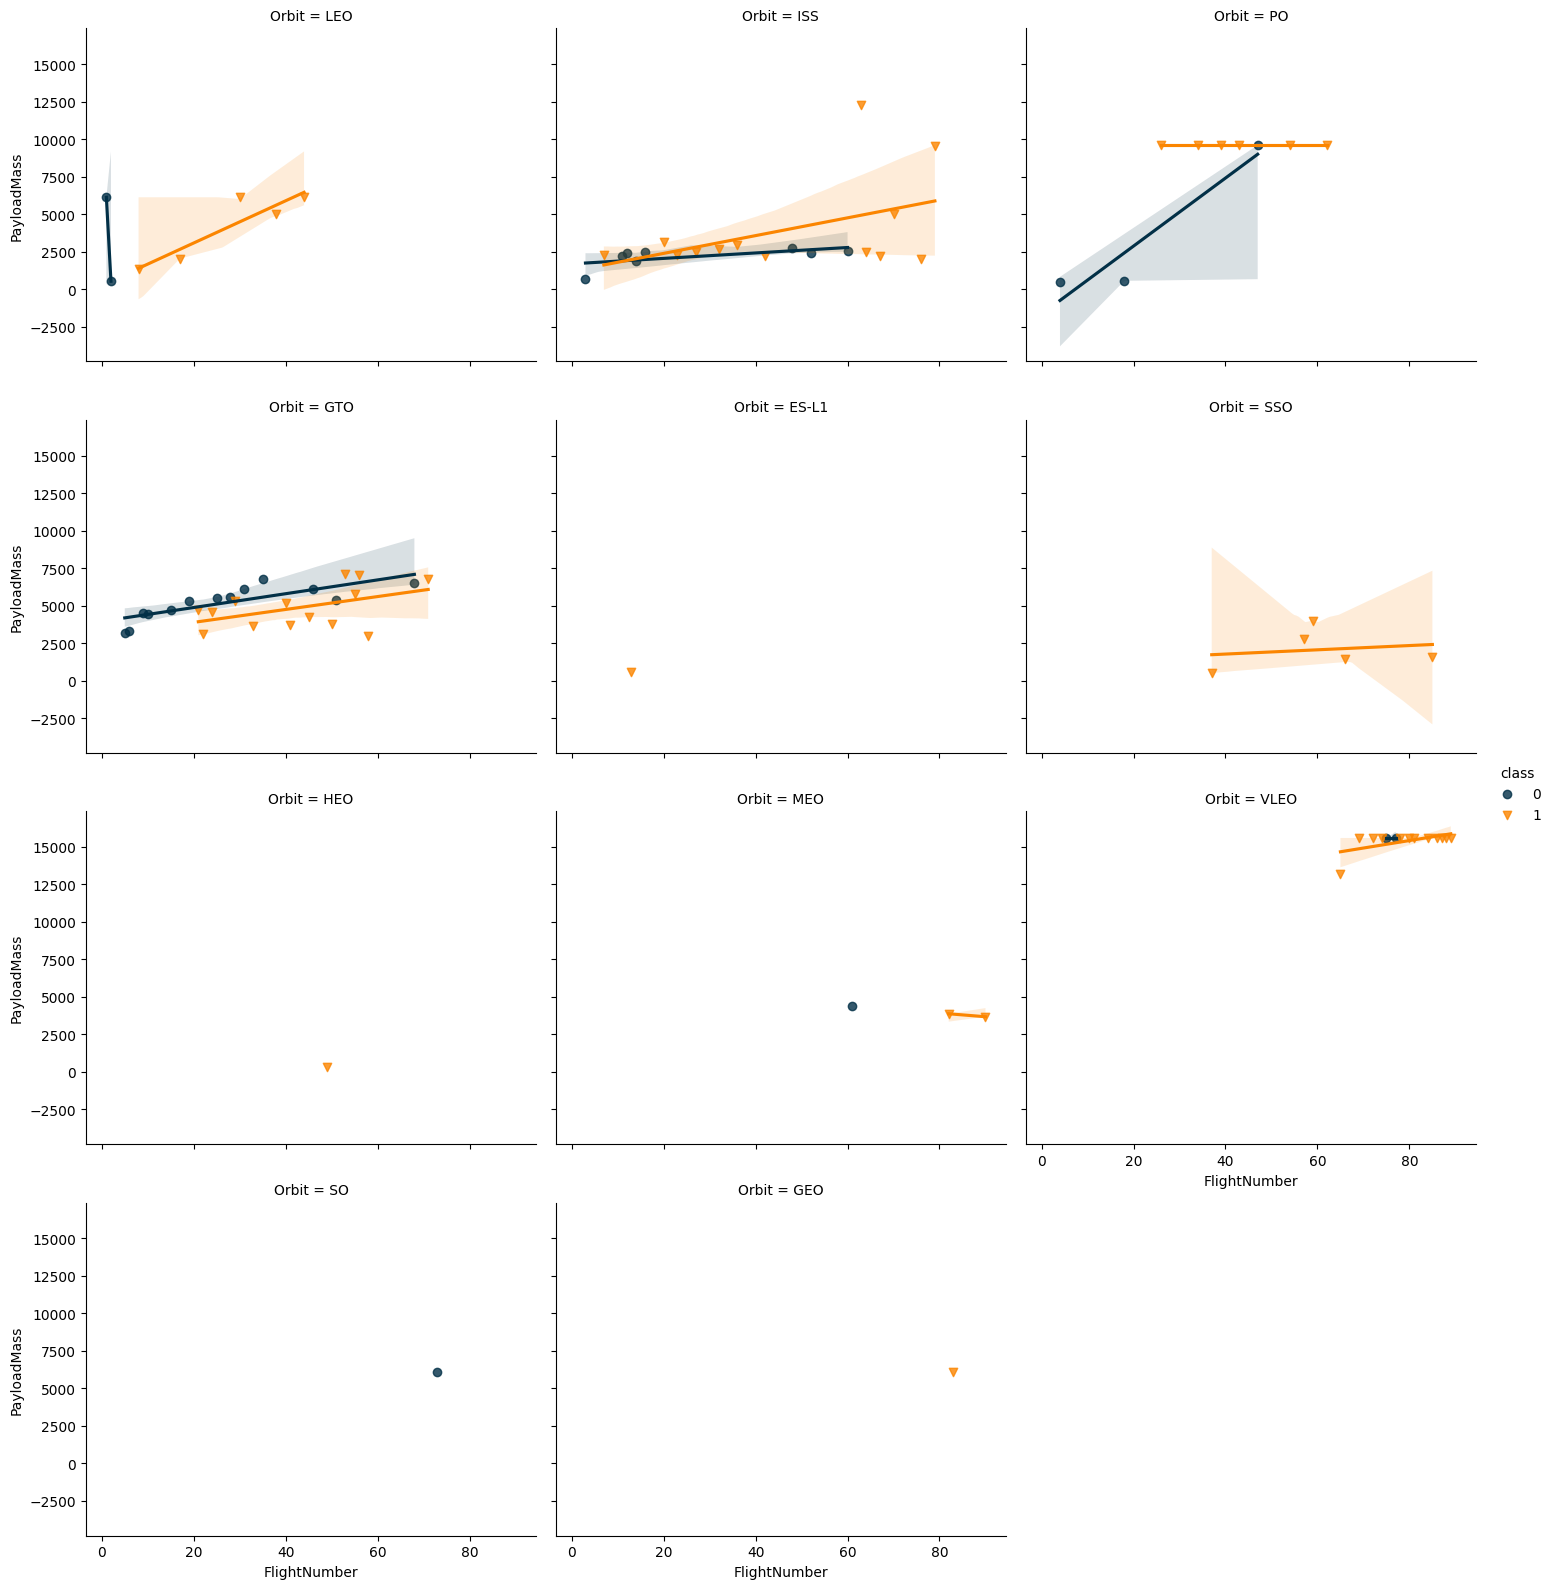

In [11]:
plt.figure(figsize=(20, 20))
sns.lmplot(data=df, 
        x="FlightNumber", 
        y="PayloadMass", 
        hue="class", 
        col="Orbit", 
        col_wrap=3, 
        height=4, 
        aspect=1.25,
        markers=["o", "v"],
        palette=customPalette)

plt.show()

*Observations:*
- The success rate increases with the number of flights for each orbit.
- This relationship is highly apparent for the __LEO__ orbit.
- __GTO__ doesn't follow this trend.

<font size='6'> The Most Suitable Orbit For The Heaviest Payload Flights </font>

In [12]:
df[df['PayloadMass'] == df['PayloadMass'].max()]['Orbit'].value_counts()    

Orbit
VLEO    13
Name: count, dtype: int64

*Observations:*
- __VLEO__ orbit dominates all other orbits receiving the heaviest payload flights.

-   
  | Orbit       |  Count |
  |-------------|--------|
  |  VLEO       |    13  |


In [13]:
# Ectract years from the date 
df['Date'] = pd.to_datetime(df['Date']).dt.year
df = df.rename(columns={'Date':'Year'})

<font size='6'>Success Rate Through Years</font>

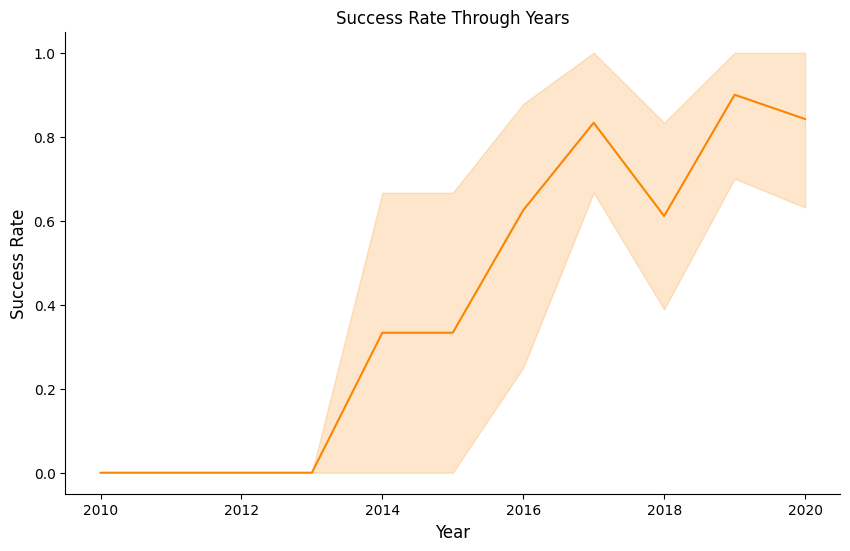

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='class', color='#fb8500')
sns.despine()
plt.xlabel('Year', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.title('Success Rate Through Years')

plt.show()

*Observations:*
- The success rate improved from 2013:2017 and 2018:2019.
- The success rate decreased from 2017:2018 and 2019:2020.
- Overall, the success rate has improved sice 2013.

<font size='6'>Mark all launch sites on a map</font>

In [15]:
geo_df = df[['Longitude', 'Latitude', 'LaunchSite', 'class']]

map = folium.Map(location=[geo_df['Latitude'].mean(), geo_df['Longitude'].mean()], zoom_start=4)

sites = folium.map.FeatureGroup()

for lat, long in zip(geo_df['Latitude'], geo_df['Longitude']):
    sites.add_child(
        folium.features.CircleMarker(
            location=[lat, long],
            radius=6,
            color='yellow',
            fill=True,
            fill_color=True,
            fill_opacity=0.6            
        )
    )

for lat, long, label in zip(geo_df['Latitude'], geo_df['Longitude'], geo_df['LaunchSite']):
    folium.Marker(
        location=[lat, long],
        popup=label
    ).add_to(map)

map.add_child(sites)

<font size='6'>Mark the success/failed launches for each site on the map </font>

In [16]:
geo_df['MarkerColor'] = geo_df['class'].map({1:'green', 0:'red'})

In [17]:
marker_cluster = plugins.MarkerCluster()
map.add_child(marker_cluster)

for lat, long, markeColor in zip(geo_df['Latitude'], geo_df['Longitude'], geo_df['MarkerColor']):
    folium.map.Marker(
        location=[lat, long],
        icon=folium.Icon(
            color='white',
            icon_color=markeColor
        )
    ).add_to(marker_cluster)

map

# <center><div style="font-family: Trebuchet MS; background-color: #023047; color: #ffb703; padding: 12px; line-height: 1;">By: Mohamed Ghannnam</div></center><center><div style="font-family: Trebuchet MS; background-color: #023047; color: #ffb703; padding: 12px; line-height: 1;">Thank You!</div></center>

linkedin: [https://www.linkedin.com/in/mohamedghannnam/](https://www.linkedin.com/in/mohamedghannnam/)